In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f7fbff'
import pprint

In [3]:
pp = pprint.PrettyPrinter(indent=2)
p_print = pp.pprint

In [4]:
random_state = 42

In [5]:
bikes_data = pd.read_csv('./Bike-Sharing-Dataset/hour.csv')

In [6]:
bikes_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [9]:
bikes_data = bikes_data.drop(['instant', 'dteday', 'holiday', 'yr', 'casual', 'registered'], axis=1)

In [10]:
bikes_data.head(3)

,season,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,6,0,1,0.22,0.2727,0.80,0.0,32


In [12]:
# No data missing?
bikes_data.isna().sum()

season        0
mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [14]:
categorized_col = ['season', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
for col in categorized_col:
    bikes_data[col] = bikes_data[col].astype('category')

# Drop temp bc high correlation to atemp
bikes_data = bikes_data.drop(['temp'], axis=1)

In [15]:
bikes_data.describe()

,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.475775,0.627229,0.190098,189.463088
std,0.171850,0.192930,0.122340,181.387599
min,0.000000,0.000000,0.000000,1.000000
25%,0.333300,0.480000,0.104500,40.000000
50%,0.484800,0.630000,0.194000,142.000000
75%,0.621200,0.780000,0.253700,281.000000
max,1.000000,1.000000,0.850700,977.000000


In [17]:
Y_col = 'cnt'
X_cols = bikes_data.drop(Y_col, axis=1).columns

X_train, X_test, y_train, y_test = train_test_split(bikes_data[X_cols], bikes_data[Y_col], test_size=0.2, random_state=random_state)

In [19]:
y_train_log1p = np.log1p(y_train)

In [18]:
RMSLEs = []
R2s = []

In [21]:
# First we'll create a base model with default parameters from sklearn
base_model = RandomForestRegressor(random_state=random_state)
base_model.fit(X_train,y_train_log1p)

RandomForestRegressor(random_state=42)

In [22]:
# Make predictions on test data with base model
y_pred = base_model.predict(X_test)

In [23]:
y_pred = np.expm1(y_pred)
RMSLEs.append(mean_squared_log_error(y_test, y_pred))
R2s.append(r2_score(y_test, y_pred))

In [24]:
print('RMSLE Value For Linear Regression: {}'.format(mean_squared_log_error(y_test, y_pred)))
print('R2 Score For Linear Regression: {}'.format(r2_score(y_test, y_pred)))

RMSLE Value For Linear Regression: 0.15276731558975376
R2 Score For Linear Regression: 0.8616907090911997


Not too bad! Let's get a visual representation of how we did

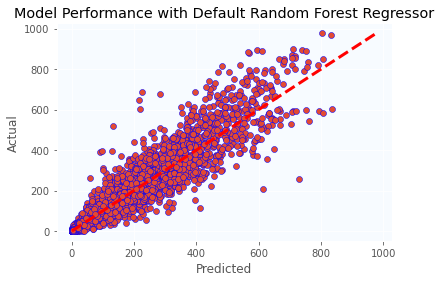

In [25]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title("Model Performance with Default Random Forest Regressor")
plt.show()

Now let's try some hyperparameter tuning to see if we can improve this

## RandomizedSearchCV Hyperparamter Tuning

In [26]:
# Specify hyperparameters for tuning

# Number of trees in the forest
n_estimators = list(range(50,501,50))

# Number of features to consider when looking for best fit
# If “auto”, then max_features=n_features.
# If “sqrt”, then max_features=sqrt(n_features)
max_features = ['auto', 'sqrt']

#The maximum depth of the tree. 
# If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
max_depth = list(range(10,111,20))
max_depth.append(None)

# The minimum number of samples required to split an internal node:
min_samples_split = [2, 5, 10]

# "Minimum number of samples required at each leaf node"
min_samples_leaf = [1, 2, 4]

# Whether bootstrap samples are used when building trees
bootstrap = [True, False]

In [27]:
# Grid of features for grid search
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
p_print(random_grid)

{ 'bootstrap': [True, False],
  'max_depth': [10, 30, 50, 70, 90, 110, None],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],
  'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [28]:
# Create Random Forest Model
model = RandomForestRegressor()

In [29]:
# Create the random search model
rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=random_state, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train_log1p)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\chess\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 30, 50, 70, 90, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=2)

In [30]:
# Let's see what these params are
p_print(rf_random.best_params_)

{ 'bootstrap': True,
  'max_depth': 90,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 350}


In [31]:
# And how they perform:
best_randomCV_model = rf_random.best_estimator_
y_pred_randomCV = best_randomCV_model.predict(X_test)
y_pred_randomCV = np.expm1(y_pred_randomCV)
RMSLEs.append(mean_squared_log_error(y_test, y_pred_randomCV))
R2s.append(r2_score(y_test, y_pred_randomCV))

In [32]:
# What's our error now?
print('RMSLE Value For Linear Regression: {}'.format(mean_squared_log_error(y_test, y_pred)))
print('R2 Score For Linear Regression: {}'.format(r2_score(y_test, y_pred)))

RMSLE Value For Linear Regression: 0.15276731558975376
R2 Score For Linear Regression: 0.8616907090911997


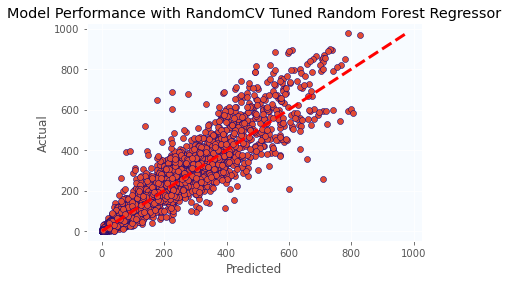

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_pred_randomCV, y_test, edgecolors=(0, 0, 0.5))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title("Model Performance with RandomCV Tuned Random Forest Regressor")
plt.show()

Hmm it looks like the model actually performed a bit worse after hyperparamter tuning!
Let's try grid search now to focus on the features that were deemed best for the model

## Grid Search Hyperparamter Tuning

In [34]:
# Create the parameter grid based on the best results of random search 
param_grid_gs = {
    'bootstrap': [True],
    'max_depth': [90, 100, None],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 5],
    'n_estimators': [300, 350, 400, 450, 500]
}
# Create a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid_gs, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train_log1p)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\chess\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100, None],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [300, 350, 400, 450, 500]},
             verbose=2)

In [35]:
p_print(grid_search.best_params_)

{ 'bootstrap': True,
  'max_depth': 100,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 500}


In [36]:
best_grid = grid_search.best_estimator_
y_pred_gridCV = best_grid.predict(X_test)
y_pred_gridCV = np.expm1(y_pred_gridCV)
RMSLEs.append(mean_squared_log_error(y_test, y_pred_gridCV))
R2s.append(r2_score(y_test, y_pred_gridCV))

In [37]:
# What's our error now?
print('RMSLE Value For Linear Regression: {}'.format(mean_squared_log_error(y_test, y_pred)))
print('R2 Score For Linear Regression: {}'.format(r2_score(y_test, y_pred)))

RMSLE Value For Linear Regression: 0.15276731558975376
R2 Score For Linear Regression: 0.8616907090911997


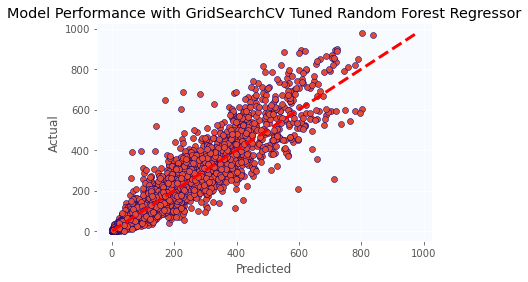

In [38]:
fig, ax = plt.subplots()
ax.scatter(y_pred_gridCV, y_test, edgecolors=(0, 0, 0.5))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title("Model Performance with GridSearchCV Tuned Random Forest Regressor")
plt.show()

Let's take a look at the various performanves we've seen so far:

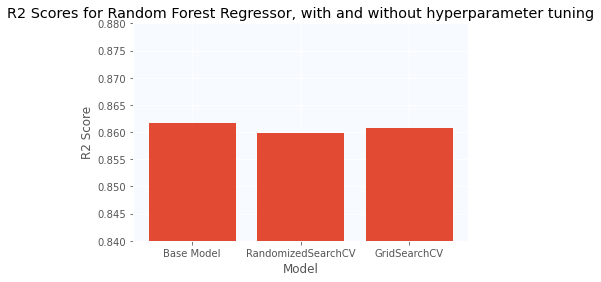

In [41]:
plt.bar(['Base Model','RandomizedSearchCV','GridSearchCV'],R2s)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Scores for Random Forest Regressor, with and without hyperparameter tuning")
plt.ylim([0.84,0.88])
plt.show()

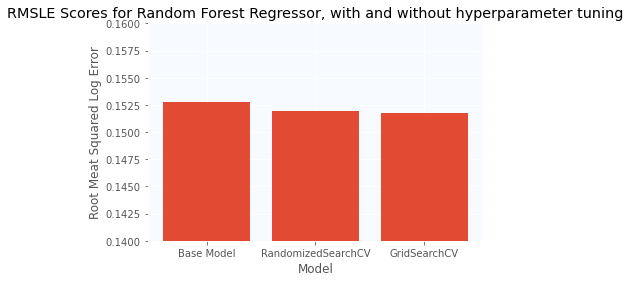

In [44]:
plt.bar(['Base Model','RandomizedSearchCV','GridSearchCV'],RMSLEs)
plt.xlabel("Model")
plt.ylabel("Root Meat Squared Log Error")
plt.title("RMSLE Scores for Random Forest Regressor, with and without hyperparameter tuning")
plt.ylim([0.14,0.16])
plt.show()

It appears that the base model performed better than the model with tuning, indicating that we have reached the limit of how well we can refine the model without running the risk of overfitting